In [4]:
#ref: https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram
import os
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.losses import CategoricalCrossentropy
from keras.models import Sequential
from keras.layers import GRU, LSTM, Conv2D, MaxPooling2D, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Activation, TimeDistributed
from PIL import Image
from keras.optimizers import Adam

#to play audio
import IPython.display as ipd

In [5]:
pasta_audios = "clean_audioset"

audio_carro_path = os.path.join(pasta_audios, "carros")
audio_moto_path = os.path.join(pasta_audios, "motocicletas") #caminho onde estão os arquivos de audio
audio_serra_path = os.path.join(pasta_audios, "motosserras")

tipo_espectrograma = "stft"

spec_base_path = os.path.join(pasta_audios, tipo_espectrograma)
spec_carro_path = os.path.join(spec_base_path, "carros")
spec_moto_path = os.path.join(spec_base_path, "motocicletas")
spec_serra_path = os.path.join(spec_base_path, "motosserras")
 
os.makedirs(spec_base_path, exist_ok=True)
os.makedirs(spec_carro_path, exist_ok=True)
os.makedirs(spec_moto_path, exist_ok=True)
os.makedirs(spec_serra_path, exist_ok=True)

In [6]:
audio_carro_clips = sorted(os.listdir(audio_carro_path))[:100]
print(f"Número de arquivos .wav na pasta {audio_carro_path} =",len(audio_carro_clips))

audio_moto_clips = sorted(os.listdir(audio_moto_path))[:100]
print(f"Número de arquivos .wav na pasta {audio_moto_path} =",len(audio_moto_clips))

audio_serra_clips = sorted(os.listdir(audio_serra_path))[:200]
print(f"Número de arquivos .wav na pasta {audio_serra_path} =",len(audio_serra_clips))

Número de arquivos .wav na pasta clean_audioset/carros = 100
Número de arquivos .wav na pasta clean_audioset/motocicletas = 100
Número de arquivos .wav na pasta clean_audioset/motosserras = 100


In [7]:
#aqui está selecionando o primeiro arquivo da lista, pode ser feito um for para pegar todos de uma vez
#verificar esse sample rate
x_carro, sr_carro = librosa.load(os.path.join(audio_carro_path, audio_carro_clips[0]))
x_moto, sr_moto = librosa.load(os.path.join(audio_moto_path, audio_moto_clips[4]))
x_serra, sr_serra = librosa.load(os.path.join(audio_serra_path, audio_serra_clips[6]))

print(type(x_carro), type(sr_carro))
print(x_carro.shape, sr_carro)

print(type(x_moto), type(sr_moto))
print(x_moto.shape, sr_moto)

print(type(x_serra), type(sr_serra))
print(x_serra.shape, sr_serra)

<class 'numpy.ndarray'> <class 'int'>
(220676,) 22050
<class 'numpy.ndarray'> <class 'int'>
(114308,) 22050
<class 'numpy.ndarray'> <class 'int'>
(220500,) 22050


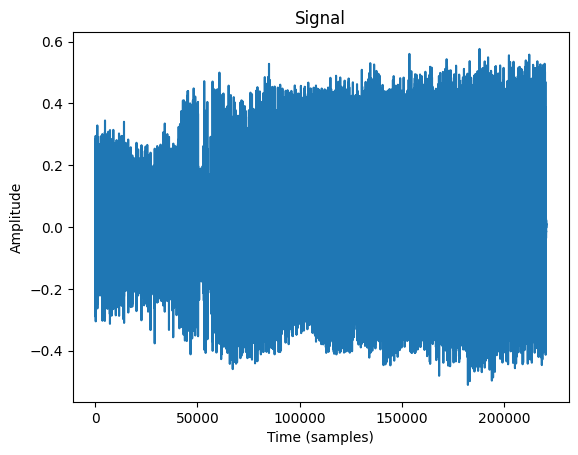

In [8]:
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load(os.path.join(audio_serra_path, audio_serra_clips[20]))
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

(129, 432)


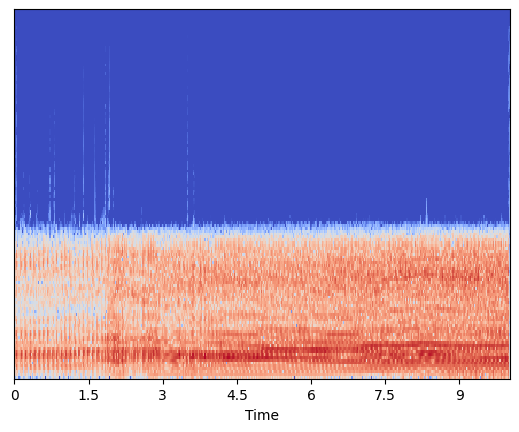

In [9]:
# fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True)

# librosa.display.waveshow(y, sr, ax=ax[i, 0])  # put wave in row i, column 0

# calculate abs values on complex numbers to get magnitude
hop_length = 512 # in num. of samples
n_fft = 256 # window in num. of samples

# perform stft
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
spectrum = librosa.amplitude_to_db(np.abs(stft))
# calculate abs values on complex numbers to get magnitude
# spectrum = np.abs(stft)
# spectrum = np.log(spectrum + 0.00000001)
librosa.display.specshow(spectrum, sr=sr, x_axis="time")

print(spectrum.shape)

# Salvar valores de espectrograma
 - Pule esse passo se os arquivos já estiverem na pasta

In [18]:

#converter o audio para espectrograma:
# é nesse amplitude_to_dB que ele está convertendo para pressão sonora. Podemos explorar outras ponderações aqui. Se não tiver implementado, podemos implementar.
def gerar_espectrograma(y, sample_rate, n_fft=256, hop_length=512):
    # STFT -> spectrogram

    # perform stft
    stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    # calculate abs values on complex numbers to get magnitude
    spectrogram = librosa.amplitude_to_db(np.abs(stft))
    # spectrogram = librosa.pcen(spectrogram)

    return spectrogram  # _positive, frequencies_positive



In [19]:

# Salvar espectrogramas na pasta específica (carros, serras etc)
def salvar_espectrogtramas (audio_clips, audio_path, spectrogram_path):
    numero_audios = len(audio_clips)
    num_arquivo = 1

    spectrogram_values = []
    
    for i, audio_name in enumerate(audio_clips):
        y, sr = librosa.load( os.path.join(audio_path, audio_name) )
        audio_name = audio_name.replace(".mp3", ".png")

        fullpath = os.path.join(spectrogram_path, audio_name)
        try:
            fft_spec = gerar_espectrograma(y, sr)
            
            fft_spec = 255 * (fft_spec - fft_spec.min()) / (fft_spec.max() - fft_spec.min())
            fft_spec = np.flip(fft_spec, axis=0) # put low frequencies at the bottom in image
            #fft_spec = 255 - fft_spec
            
            # Salva o arquivo e começa o próximo
            # np.savetxt(fullpath, fft_spec, delimiter=",")
            im = Image.fromarray(fft_spec).convert("L")
            im.save(fullpath)
            print("Arquivo %s salvo com sucesso." % fullpath)
                
        except Exception as e:
            print( "Erro ao salvar %s: %s." % (fullpath, e) )


salvar_espectrogtramas(audio_carro_clips, audio_carro_path, spec_carro_path)

salvar_espectrogtramas(audio_moto_clips, audio_moto_path, spec_moto_path)

salvar_espectrogtramas(audio_serra_clips, audio_serra_path, spec_serra_path)


Arquivo clean_audioset/stft/carros/(HD) - Forza 4 - Top Gear - Car Test - 1990 Lotus Carlton-0GZbu00-aMY.png salvo com sucesso.
Arquivo clean_audioset/stft/carros/1968 Chevy Camaro - V8 327 - MUSCLECAR SOUND - restauriert-1ddvRm8MURI.png salvo com sucesso.
Arquivo clean_audioset/stft/carros/1995 Toyota Supra FOR SALE-2-1wY_Ndtgw.png salvo com sucesso.
Arquivo clean_audioset/stft/carros/2013 Porsche 911 Carrera Start Up and Review 3.4 L Horizontally Opposed⧸6 Cylinder-9BzZvj5W09s.png salvo com sucesso.
Arquivo clean_audioset/stft/carros/95 Mustang drag car start up-1sjKon7lrLY.png salvo com sucesso.
Arquivo clean_audioset/stft/carros/99 Trans Am WS6 - Donuts, Take-Offs, 110MPH!-G4Rp68qV_aw.png salvo com sucesso.
Arquivo clean_audioset/stft/carros/A guy trying to start car after flood-0TGPaUN2V5Q.png salvo com sucesso.
Arquivo clean_audioset/stft/carros/AX kit car-1-Vhr9Ut4Tg.png salvo com sucesso.
Arquivo clean_audioset/stft/carros/Atlanta GA： 1999 Jeep Grand Cherokee - Ignition Lock  P

# Treinamento e teste de rede neural

In [17]:
# Carregar espectrogramas com uma CNN e classificar entre "motosserras e não motosserras"

espectrogramas_carro = sorted(os.listdir(spec_carro_path))
espectrogramas_moto = sorted(os.listdir(spec_moto_path))
espectrogramas_serra = sorted(os.listdir(spec_serra_path))

spectrogram_list = []
labels = []

print(espectrogramas_carro)

[]


In [ ]:

def cortar_espectrograma(spectrogram, largura_janela=128, altura_janela=128):
    largura_spec = spectrogram.shape[0]
    altura_spec = spectrogram.shape[1]
    spectrogram_slices = []

    for h in range(altura_janela, altura_spec, altura_janela):
        for w in range(largura_janela, largura_spec, largura_janela):
            slice = spectrogram[w-largura_janela : w,   # largura
                                h-altura_janela : h,  # altura
                                np.newaxis]
            spectrogram_slices.append(slice)
            
    return spectrogram_slices


def adicionar_rotulos_spec(espectrogramas, spec_path, lbl, spectrogram_list, labels):
    for filename in tqdm(espectrogramas):
        full_filename = os.path.join(spec_path, filename)  
        spectrogram = np.array(Image.open(full_filename))
        print(spectrogram.shape)
        spectrogram_slices = cortar_espectrograma(spectrogram)
        spectrogram_list += spectrogram_slices

        labels += [lbl] * len(spectrogram_slices)
        
        # 0 corresponde aos carros e motos
        
print("Cortando imagens e adicionando os rótulos...")

adicionar_rotulos_spec(espectrogramas_carro, spec_carro_path, 0, spectrogram_list, labels)
adicionar_rotulos_spec(espectrogramas_moto, spec_moto_path, 0, spectrogram_list, labels)
adicionar_rotulos_spec(espectrogramas_serra, spec_serra_path, 1, spectrogram_list, labels)

spectrograms_array = np.array(spectrogram_list)
labels_array = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    spectrograms_array, labels_array, test_size=0.2  # , random_state=42
)

In [2]:
# Initialize the model
print(X_train.shape)
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[0], X_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before fully connected layers
model.add(Flatten())

# Fully connected layer with dropout
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(1, activation='sigmoid')) # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Print model summary
model.summary()
model.fit(X_train, y_train, epochs=25, validation_split=0.2)


NameError: name 'X_train' is not defined

In [ ]:
model = Sequential()
model.add(Conv1D(16, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model.summary()
model.fit(X_train, y_train, epochs=100)#, batch_size=64)

In [64]:

# model.fit(X_train, y_train, epochs=30)
y_pred = model.predict(X_test)[:, 0]
y_pred = np.round(y_pred)
acc = len(np.where(y_pred == y_test)[0]) / len(y_test)
print("Acurácia:", acc)

6/6 [==============================] - 2s 285ms/step
Acurácia: 0.7586206896551724
